In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [2]:
mnist_label_skew = pd.read_csv(r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/label_skew/mnist/MNIST_8_dataset_blueprint.csv')
fmnist_label_skew = pd.read_csv(r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/label_skew/fmnist/FMNIST_8_dataset_blueprint.csv')
cifar_label_skew = pd.read_csv(r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/label_skew/cifar10/CIFAR10_6_dataset_blueprint.csv')

mnist_quality_skew = pd.read_csv(r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/quality_skew/mnist/MNIST_8_dataset_blueprint.csv')
fmnist_quality_skew = pd.read_csv(r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/quality_skew/fmnist/FMNIST_8_dataset_blueprint.csv')
cifar_quality_skew = pd.read_csv(r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/quality_skew/cifar10/CIFAR10_6_dataset_blueprint.csv')

In [7]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


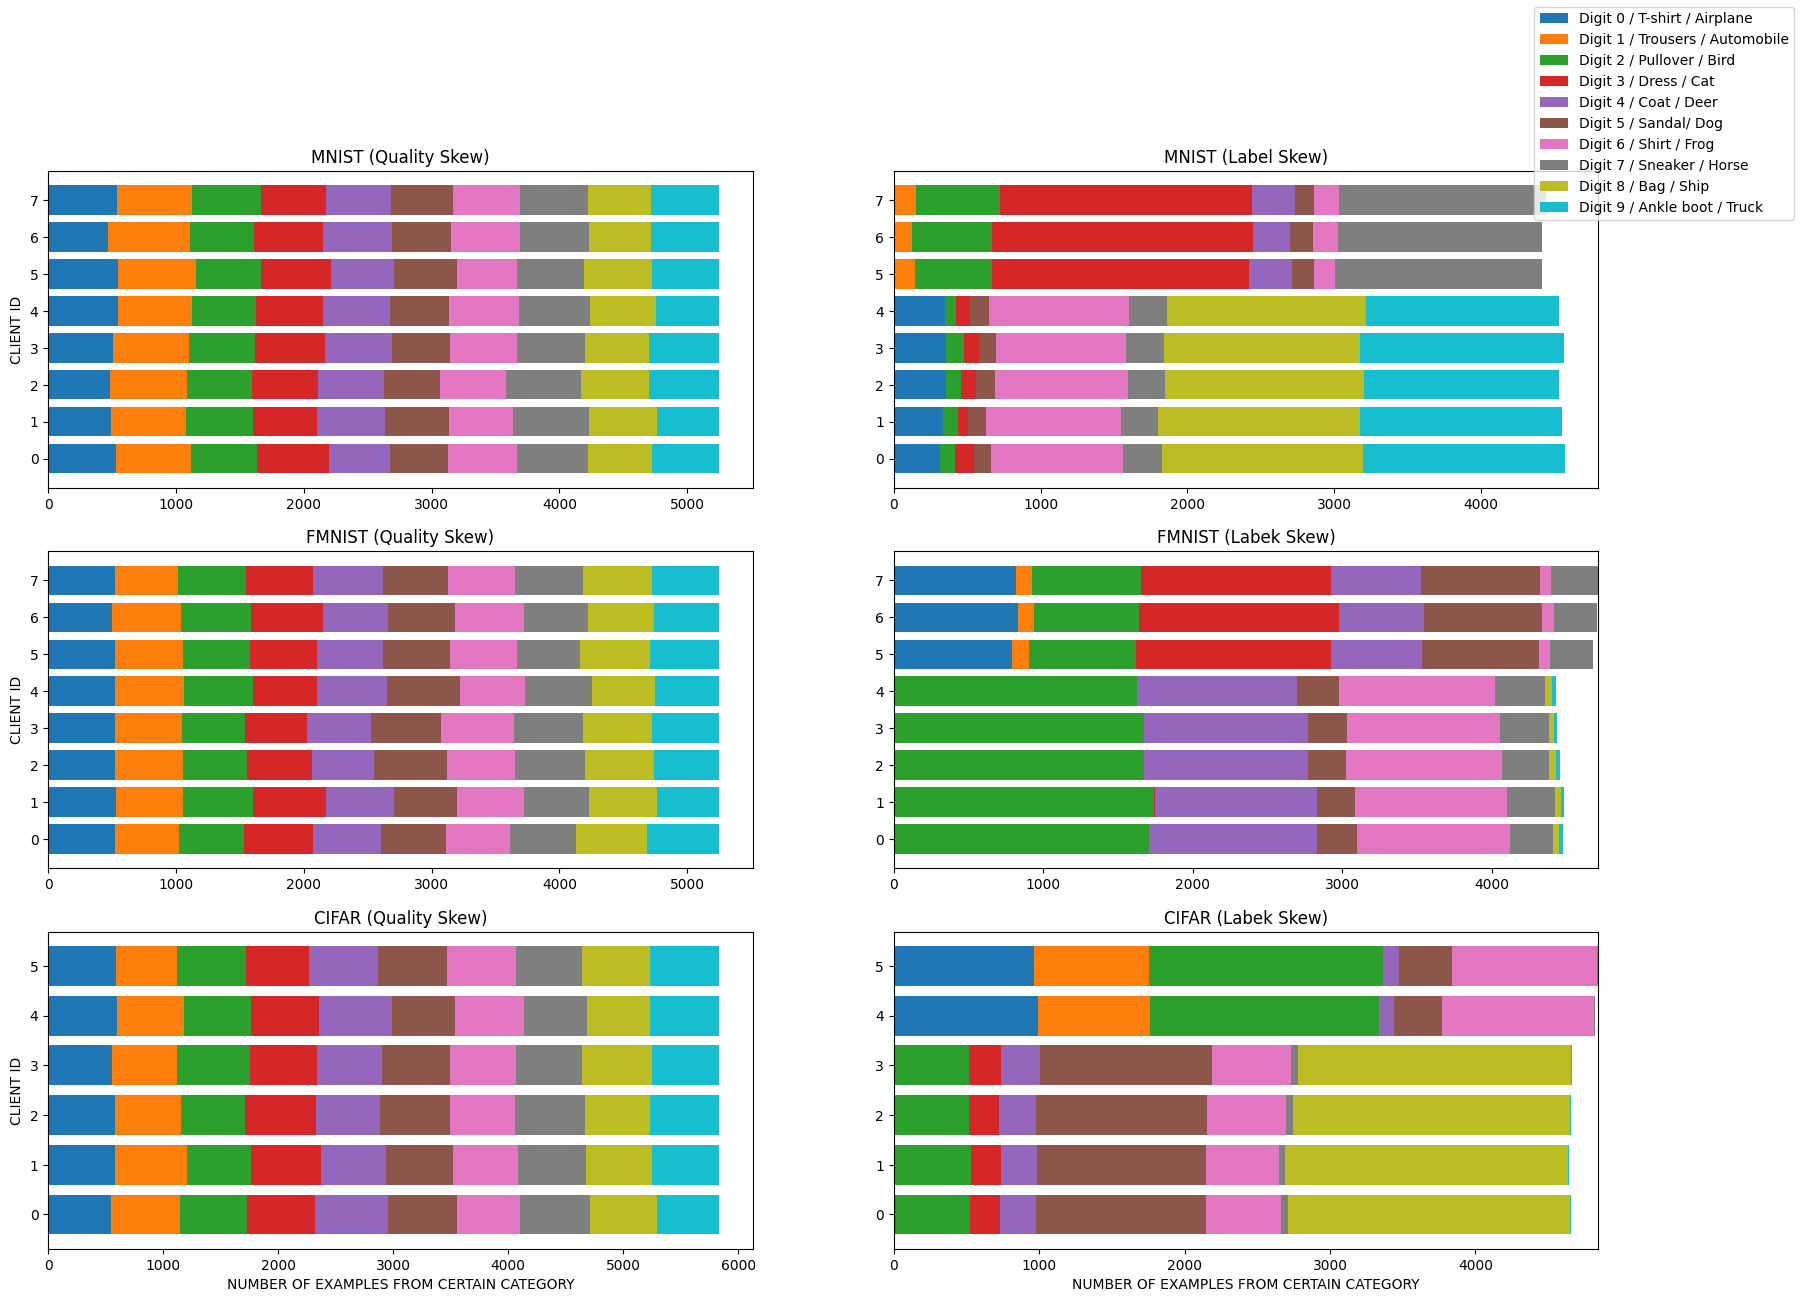

In [23]:
l = set_size(width='thesis', subplots=(2, 3), fraction=4)
fig, axes = plt.subplots(3, 2, figsize=(20, 14))

# MNIST
distribution = mnist_quality_skew
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[0][0].barh(r, s[k], left=left_length, label=k)
    axes[0][0].set_yticks([0,1,2,3,4,5,6,7])
    axes[0][0].set_title("MNIST (Quality Skew)")
    axes[0][0].set_ylabel("CLIENT ID")

distribution = mnist_label_skew
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[0][1].barh(r, s[k], left=left_length, label=k)
    axes[0][1].set_yticks([0,1,2,3,4,5,6,7])
    axes[0][1].set_title("MNIST (Label Skew)")


#FMNIST
distribution = fmnist_quality_skew
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[1][0].barh(r, s[k], left=left_length, label=k)
    axes[1][0].set_yticks([0,1,2,3,4,5,6,7])
    axes[1][0].set_title("FMNIST (Quality Skew)")
    axes[1][0].set_ylabel("CLIENT ID")

distribution = fmnist_label_skew
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[1][1].barh(r, s[k], left=left_length, label=k)
    axes[1][1].set_yticks([0,1,2,3,4,5,6,7])
    axes[1][1].set_title("FMNIST (Labek Skew)")


#CIFAR 10
distribution = cifar_quality_skew
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[2][0].barh(r, s[k], left=left_length, label=k)
    axes[2][0].set_yticks([0,1,2,3,4,5])
    axes[2][0].set_title("CIFAR (Quality Skew)")
    axes[2][0].set_xlabel("NUMBER OF EXAMPLES FROM CERTAIN CATEGORY")
    axes[2][0].set_ylabel("CLIENT ID")

distribution = cifar_label_skew
s = distribution[distribution['partition'] == 'train_set'].drop(['client_id', 'partition', 'total_samples'], axis=1).to_numpy().T
r = range(s.shape[1])
for k in range(s.shape[0]):
    left_length = 0
    for previous in range(k):
        left_length += s[previous]
    axes[2][1].barh(r, s[k], left=left_length, label=k)
    axes[2][1].set_yticks([0,1,2,3,4,5])
    axes[2][1].set_title("CIFAR (Labek Skew)")
    axes[2][1].set_xlabel("NUMBER OF EXAMPLES FROM CERTAIN CATEGORY")

handles, labels = axes[0][0].get_legend_handles_labels()
print(labels)
labels = ['Digit 0 / T-shirt / Airplane', 'Digit 1 / Trousers / Automobile', 'Digit 2 / Pullover / Bird', 'Digit 3 / Dress / Cat', 'Digit 4 / Coat / Deer', 'Digit 5 / Sandal/ Dog', 'Digit 6 / Shirt / Frog', 'Digit 7 / Sneaker / Horse', 'Digit 8 / Bag / Ship', 'Digit 9 / Ankle boot / Truck']
fig.legend(handles, labels, loc='upper right')

In [8]:
mnist_source = r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/quality_skew/mnist/MNIST_8_dataset_pointers'
fmnist_source = r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/quality_skew/fmnist/FMNIST_8_dataset_pointers'
cifar_source = r'/home/maciejzuziak/raid/archive/MIA_SHAP/experiments/datasets/quality_skew/cifar10/CIFAR10_6_dataset_pointers'
with open(mnist_source, 'rb') as file:
    mnist = pickle.load(file)

with open(fmnist_source, 'rb') as file:
    fmnist = pickle.load(file)

with open(cifar_source, 'rb') as file:
    cifar = pickle.load(file)

In [14]:
mnist[1]

[[Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      features: ['image', 'label'],
      num_rows: 2250
  })],
 [Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      features: ['image', 'label'],
      num_rows: 2250
  })],
 [Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      features: ['image', 'label'],
      num_rows: 2250
  })],
 [Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      features: ['image', 'label'],
      num_rows: 2250
  })],
 [Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      features: ['image', 'label'],
      num_rows: 2250
  })],
 [Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      features: ['image', 'label'],
      num_rows: 2250
  })],
 [Dataset({
      features: ['image', 'label'],
      num_rows: 5250
  }),
  Dataset({
      f

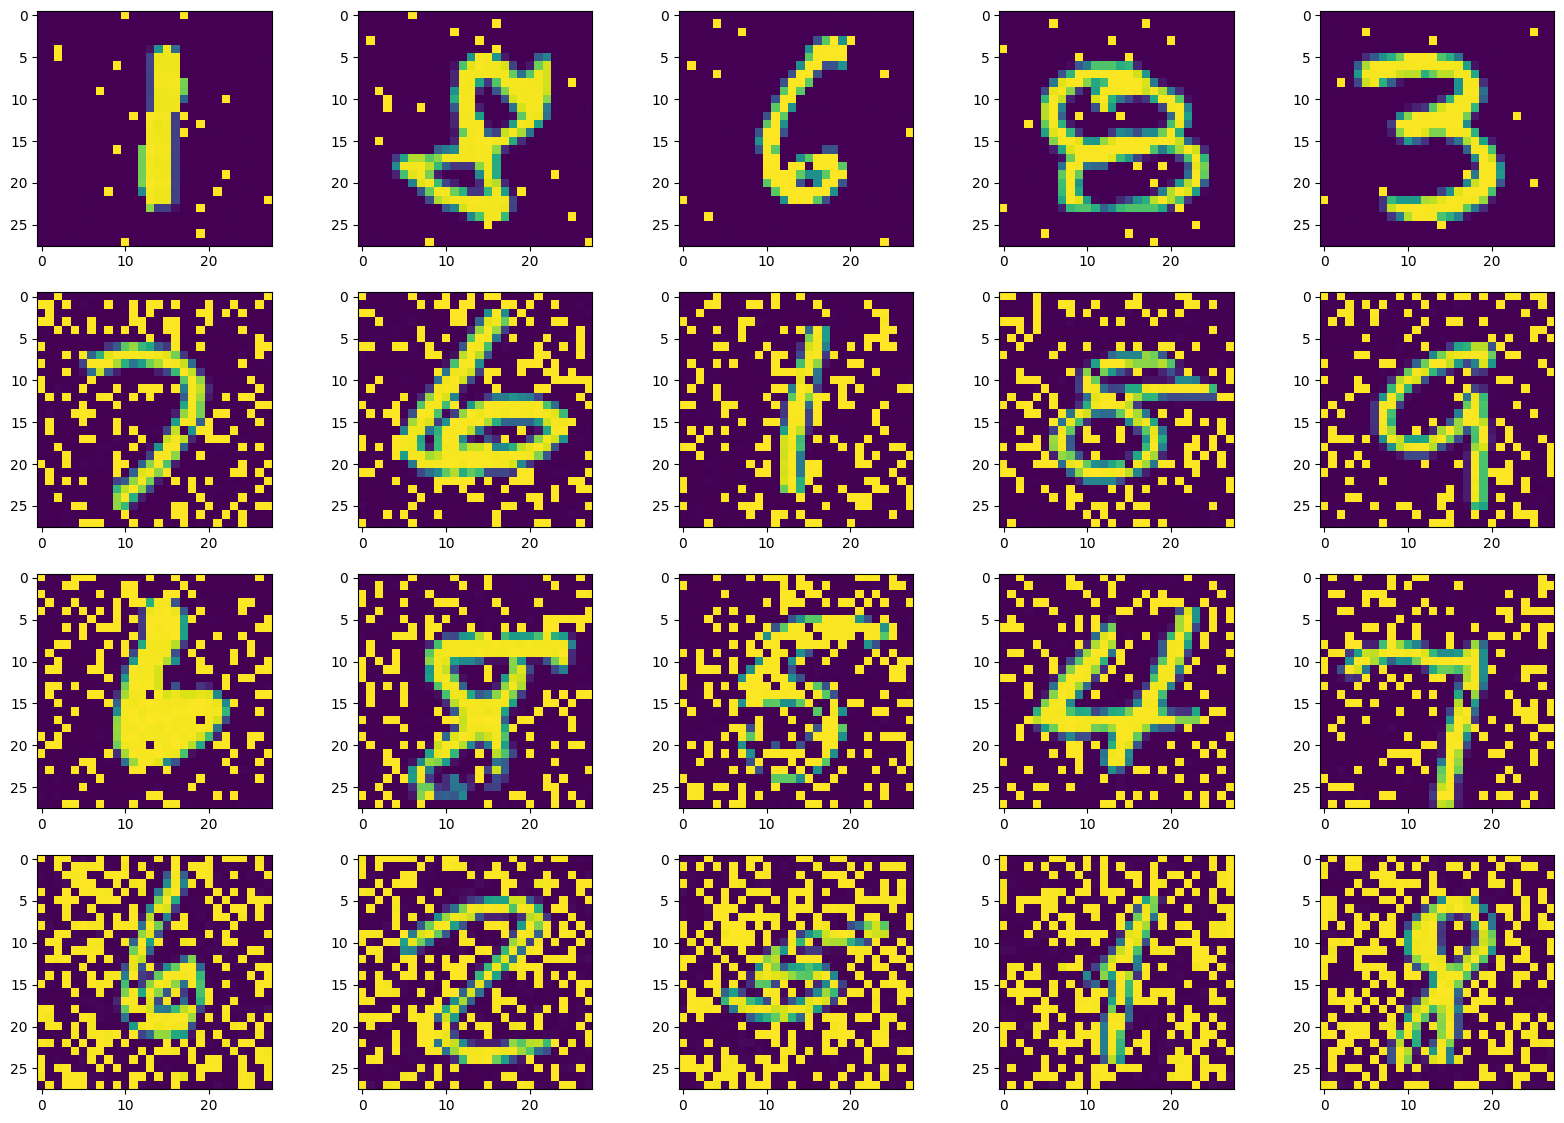

In [25]:
fig, axes = plt.subplots(4, 5, figsize=(20, 14))

for client in range(4):
    for image in range(5):
        axes[client][image].imshow(mnist[1][client][0][image]['image'])